Nodes in the graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges in the graph: [(0, 2), (0, 4), (0, 5), (0, 7), (1, 3), (1, 5), (1, 8), (2, 6), (3, 5), (3, 6), (3, 7), (4, 6), (5, 6), (6, 9)]
Maximum Independent Set: {2, 3, 4, 8, 9}
Size of Maximum Independent Set: 5
Is the set independent? True


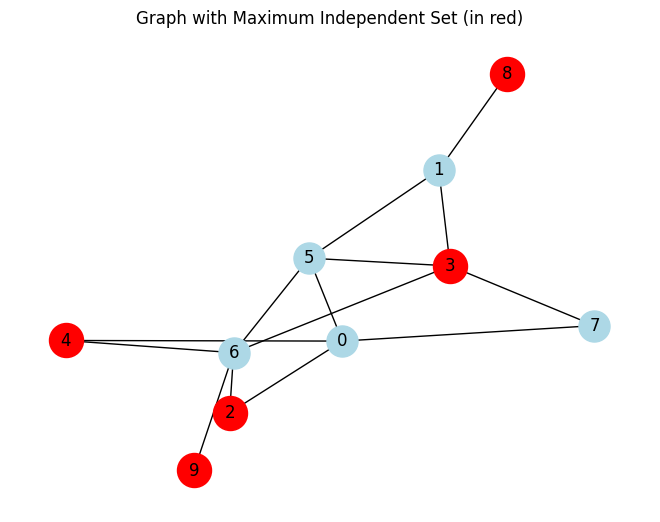

In [13]:
import networkx as nx
import random

def mis(G):
    if not G.nodes():
        return set()
    
    # Case 1: Maximum degree ≤ 2
    if max(dict(G.degree()).values(), default=0) <= 2:
        return set(nx.maximal_independent_set(G))
    
    # Case 2: Vertex with degree 1 exists
    degree_1_nodes = [v for v, d in G.degree() if d == 1]
    if degree_1_nodes:
        v = degree_1_nodes[0]
        neighbors = set(G.neighbors(v))
        G_new = G.copy()
        G_new.remove_nodes_from([v] + list(neighbors))
        return {v} | mis(G_new)
    
    # Case 3: Graph is not connected
    if not nx.is_connected(G):
        components = list(nx.connected_components(G))
        return set().union(*(mis(G.subgraph(c)) for c in components))
    
    # Case 4: General case
    v = max(G.degree(), key=lambda x: x[1])[0]
    G_without_v = G.copy()
    G_without_v.remove_node(v)
    set1 = mis(G_without_v)
    
    neighbors = set(G.neighbors(v))
    G_with_v = G.copy()
    G_with_v.remove_nodes_from(neighbors | {v})
    set2 = {v} | mis(G_with_v)
    
    return max(set1, set2, key=len)

def generate_random_graph(n, p):
    """Generate a random graph with n nodes and edge probability p."""
    return nx.erdos_renyi_graph(n, p)

# Example usage
if __name__ == "__main__":
    # Generate a random graph
    n = 10  # number of nodes
    p = 0.3  # probability of edge creation
    G = generate_random_graph(n, p)
    
    # Find the maximum independent set
    max_independent_set = mis(G)
    
    print(f"Nodes in the graph: {G.nodes()}")
    print(f"Edges in the graph: {G.edges()}")
    print(f"Maximum Independent Set: {max_independent_set}")
    print(f"Size of Maximum Independent Set: {len(max_independent_set)}")
    
    # Verify that the set is indeed independent
    is_independent = all(not G.has_edge(u, v) for u in max_independent_set for v in max_independent_set if u != v)
    print(f"Is the set independent? {is_independent}")

    #Optional: Visualize the graph
    #Uncomment the following lines if you have matplotlib installed
    import matplotlib.pyplot as plt
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=max_independent_set, node_color='red', node_size=600)
    plt.title("Graph with Maximum Independent Set (in red)")
    plt.show()